# yolov5
version 2 test

author: nmc-costa

info: testing version 2


# Setup
Go to tutorial_yolov5.ipnb for full setup (like cloning the yolov5 repo, etc...)

In [17]:
import os
import sys
import platform
import torch
from IPython.display import Image, clear_output  # to display images

#cuda or cpu version
clear_output()
print('OS: {}'.format(platform.platform()))
print("Python: " + sys.version)
#os.environ["CUDA_VISIBLE_DEVICES"]="" #force CPU
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

OS: Darwin-18.7.0-x86_64-i386-64bit
Python: 3.7.7 (default, May  6 2020, 04:59:01) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
Setup complete. Using torch 1.5.1 CPU


In [18]:
#yolov5 repo [other ways: %cd yolov5; or pip install yolov5 module as "editable" using a setup.py file]
import yolov5
from yolov5.utils.google_utils import gdrive_download  # to download models/datasets


## init vars

In [19]:
#script dir [in case you use cd]
scriptdir=sys.path[0] #os.getcwd()

#yolov5 Dir
yolov5_dir=os.path.join(scriptdir, 'yolov5')
print(yolov5_dir)

/Users/nm.costa/Google_Drive/projects/bosch_P19/research/python_ws/violent_action/yolo/yolov5


## input data

#### Prepare the dataset for yolo format (CHECK OUT https://github.com/ultralytics/yolov5/wiki/Train-Custom-Data ; https://medium.com/towards-artificial-intelligence/yolo-v5-is-here-custom-object-detection-tutorial-with-yolo-v5-12666ee1774e)

##### 1. create dataset .yaml file (like coco_external)

Yolov5 algorithm parses yaml information: path to dataset(train, validation and test) in YOLO (darknet) format (see below); number of classes and classes names

##### 2. Create labels and organize dataset in YOLO format (USE $JSON2YOLO$ folder)

Dataset Directory structure:
- dataset:
    - annotations:
        - samefoldername.json (WARNING: use 'train', 'val', 'test')
    - images:
        - samefoldername
    - labels:
        - samefoldername

Example :

dataset/images/train/000000109622.jpg  # image

dataset/labels/train/000000109622.txt  # label



##### 3. Select a Model(yolov5s, yolov5x, ...) and update the number of classes to match the dataset

Go to $./models$ folder and change the $nc: $ parameter 

In [20]:
#YAML Paths
yaml=os.path.join(scriptdir, 'tao128_external.yaml')

## 1. Train
Run the training command below to train for X epochs. 

EXAMPLE: You can train YOLOv5s from scratch by passing `--cfg yolov5s.yaml --weights ''`, or train from a pretrained checkpoint by passing a matching weights file: `--cfg yolov5s.yaml --weights yolov5s.pt`.

Train function retrains the model with the new 'train' data and tests the model against the 'val' data

All training results are saved to runs/exp0 for the first experiment, then runs/exp1, runs/exp2 etc. for subsequent experiments.

In [5]:
# Clear any logs from previous runs
logdir=os.path.join(yolov5_dir, 'runs/exp0')
!rm -rfv $logdir

In [23]:
# Start tensorboard (optional)
#BUG WINDOWS are not able to log information
%cd $yolov5_dir

%load_ext tensorboard
#%reload_ext tensorboard
%tensorboard --logdir runs

C:\Users\nmc_costa\google_drive\projects\bosch_P19\research\python_ws\violent_action\yolo\yolov5
The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 14672), started 5:49:23 ago. (Use '!kill 14672' to kill it.)

In [6]:
# Train Models from scractch 
#(#WARNING: if using --cache parameter you need to be careful: in yolov5.utils.datasets gives keyerror; #SOLUTION delete cache in dataset folder or don't use --cache)
%cd $yolov5_dir
#!pwd
# !ls
!python train.py --img 640 --batch 8 --epochs 3 --data $yaml --cfg ./models/yolov5s.yaml --weights yolov5s.pt

C:\Users\nmc_costa\google_drive\projects\bosch_P19\research\python_ws\violent_action\yolo\yolov5
Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Apex recommended for faster mixed precision training:


  0%|          | 0/128 [00:00<?, ?it/s]
Scanning labels D:\external_datasets\yoloformat\tao128\labels\train.cache (128 found, 0 missing, 0 empty, 0 duplicate, for 128 images): 100%|##########| 128/128 [00:00<00:00, 16048.03it/s]

  0%|          | 0/128 [00:00<?, ?it/s]
Scanning labels D:\external_datasets\yoloformat\tao128\labels\val.cache (128 found, 0 missing, 0 empty, 0 duplicate, for 128 images): 100%|##########| 128/128 [00:00<00:00, 15925.22it/s]

Evolving anchors with Genetic Algorithm:   0%|          | 0/1000 [00:00<?, ?it/s]
Evolving anchors with Genetic Algorithm: fitness = 0.7437:  21%|##        | 206/1000 [00:00<00:00, 2059.98it/s]
Evolving anchors with Genetic Algorithm: fitness = 0.7443:  40%|####      | 402/1000 [00:00<00:00, 2022.66it/s]
Evolving anchors with Genetic Algorithm: fitness = 0.7448:  58%|#####8    | 583/1000 [00:00<00:00, 1953.79it/s]
Evolving anchors with Genetic Algorithm: fitness = 0.7450:  76%|#######6  | 763/1000 [00:00<00:00, 1898.93it/s]
Evolving an


Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Apex recommended for faster mixed precision training: https://gi

       0/2      3.4G    0.1408   0.04296    0.1956    0.3794        67       640:   6%|6         | 1/16 [00:05<01:29,  5.94s/it]
       0/2     5.99G    0.1332   0.04149    0.1976    0.3723        41       640:   6%|6         | 1/16 [00:06<01:29,  5.94s/it]
       0/2     5.99G    0.1332   0.04149    0.1976    0.3723        41       640:  12%|#2        | 2/16 [00:07<01:03,  4.51s/it]
       0/2     6.75G    0.1329   0.04117    0.1969     0.371        49       640:  12%|#2        | 2/16 [00:07<01:03,  4.51s/it]
       0/2     6.75G    0.1329   0.04117    0.1969     0.371        49       640:  19%|#8        | 3/16 [00:08<00:45,  3.49s/it]
       0/2     6.75G    0.1209   0.04056    0.1802    0.3416        39       640:  19%|#8        | 3/16 [00:08<00:45,  3.49s/it]
       0/2     6.75G    0.1209   0.04056    0.1802    0.3416        39       640:  25%|##5       | 4/16 [00:08<00:32,  2.68s/it]
       0/2     6.75G    0.1155   0.03992    0.1701    0.3255        47       640:  25%|##5       


  6                -1  1    641792  models.common.BottleneckCSP             [256, 256, 3]                 
  7                -1  1   1180672  models.common.Conv                      [256, 512, 3, 2]              
  8                -1  1    656896  models.common.SPP                       [512, 512, [5, 9, 13]]        
  9                -1  1   1248768  models.common.BottleneckCSP             [512, 512, 1, False]          
 10                -1  1    131584  models.common.Conv                      [512, 256, 1, 1]              
 11                -1  1         0  torch.nn.modules.upsampling.Upsample    [None, 2, 'nearest']          
 12           [-1, 6]  1         0  models.common.Concat                    [1]                           
 13                -1  1    378624  models.common.BottleneckCSP             [512, 256, 1, False]          
 14                -1  1     33024  models.common.Conv                      [256, 128, 1, 1]              
 15                -1  1         0  

## 2. Output data (Visualize)

View runs/exp0/train*.jpg images to see training images, labels and augmentation effects. A Mosaic Dataloader is used for training (shown below), a new concept developed by Ultralytics and first featured in YOLOv4. If your labels are not correct in these images then you have incorrectly labelled your data, and should revisit 2. Create Labels.

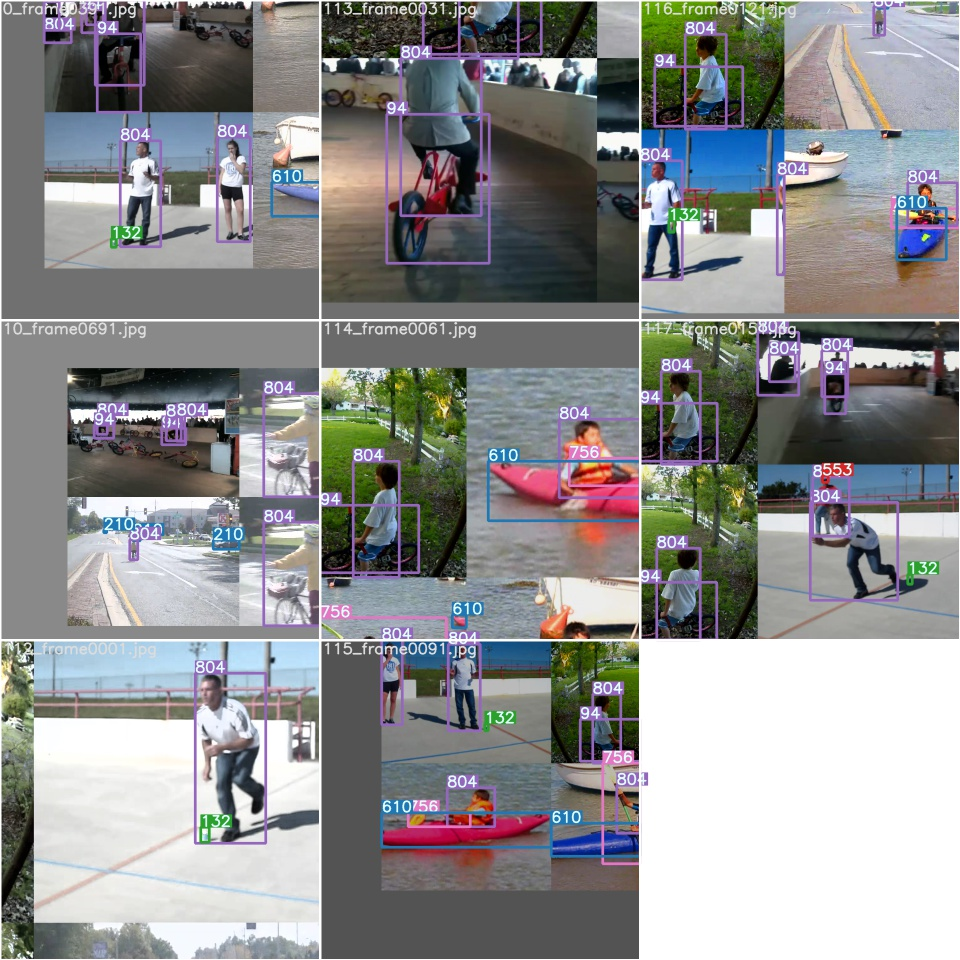

In [7]:
Image(filename=os.path.join(yolov5_dir,'runs/exp0/train_batch0.jpg'), width=900)

## 3. Inference (detect)

In [13]:
%cd $yolov5_dir
!python detect.py --source D:/external_datasets/mlab_samples/VIDEOS --output  D:/external_datasets/mlab_samples/inference/yolov5/yolov5s_tao128test_augment --weights runs/exp0/weights/best.pt --conf 0.4 --augment

C:\Users\nmc_costa\google_drive\projects\bosch_P19\research\python_ws\violent_action\yolo\yolov5
Namespace(agnostic_nms=False, augment=True, classes=None, conf_thres=0.4, device='', img_size=640, iou_thres=0.5, output='D:/external_datasets/mlab_samples/inference/yolov5/yolov5s_tao128test_augment', save_txt=False, source='D:/external_datasets/mlab_samples/VIDEOS', update=False, view_img=False, weights=['runs/exp0/weights/best.pt'])
Using CUDA device0 _CudaDeviceProperties(name='GeForce GTX 1070', total_memory=8192MB)

Fusing layers... Model Summary: 140 layers, 1.05611e+07 parameters, 6.61683e+06 gradients
video 1/9 (1/53) D:\external_datasets\mlab_samples\VIDEOS\VID_20200903_112019.mp4: 384x640 Done. (0.086s)
video 1/9 (2/53) D:\external_datasets\mlab_samples\VIDEOS\VID_20200903_112019.mp4: 384x640 Done. (0.057s)
video 1/9 (3/53) D:\external_datasets\mlab_samples\VIDEOS\VID_20200903_112019.mp4: 384x640 Done. (0.048s)
video 1/9 (4/53) D:\external_datasets\mlab_samples\VIDEOS\VID_2020090

## 4. (Re-) Test/validate

(Re-) Test a model on dataset to determine trained accuracy (WARNING : Train already does this). Models are auto-downloaded from Google Drive. To show results by class use the --verbose flag.

In [ ]:
# SHELL Ipython: Run YOLOv5x on COCO validation images
%cd $yolov5_dir
#!pwd
#!ls
!python test.py --weights runs/exp0/weights/best.pt --data $yaml --task 'val' --img 640 --verbose --save

/Users/nm.costa/Google_Drive/projects/bosch_P19/research/python_ws/violent_action/yolo/yolov5
Namespace(augment=False, batch_size=32, conf_thres=0.001, data='/Users/nm.costa/Google_Drive/projects/bosch_P19/research/python_ws/violent_action/yolo/tao128_external.yaml', device='', img_size=672, iou_thres=0.65, merge=False, save_json=False, single_cls=False, task='val', verbose=True, weights=['/Users/nm.costa/Google_Drive/projects/bosch_P19/research/python_ws/violent_action/yolo/yolov5/runs/exp0/weights/best.pt'])
Using CPU

Fusing layers... Model Summary: 140 layers, 1.05611e+07 parameters, 6.61683e+06 gradients
Scanning images: 100%|███████████████████████| 128/128 [00:00<00:00, 301.10it/s]
Scanning labels /Volumes/Seagate/p19/external_datasets/yoloformat/tao128/labels/
               Class      Images     Targets           P           R      mAP@.5